In [12]:
# studio del numero dei viaggi divisi per zona
# cosa fare:
# 1 - leggere il file csv
# 2 - contare i viaggi per ogni zona
# 3 - leggere file per le zone geografiche
# 4 - unire i dati dei viaggi con le zone geografiche
# 5 - creare una mappa

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import pathlib
import os
import seaborn as sns


city = "Boston"
year = '2022'

# 3 - leggere file per le zone geografiche
zipcode_file = pathlib.Path("/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/tl_2017_us_zcta510.zip")
# Check existence
if zipcode_file.exists():
    zipcode_gdf = gpd.read_file(f"zip://{zipcode_file}")
else:
    print("File not found! Make sure it's in the current directory.")

trips_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/trips'
stations_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/stations'
self_loop_data = '/Users/gaiapizzuti/Documents/unitn/Bike-Inequality/data/self_loops'

color = sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

  zipcode   start     end
0   02115  220792  229008
1   02142  192087  194707
2   02119   23595   22310
3   02215  272543  277007
4   02120   69702   67931


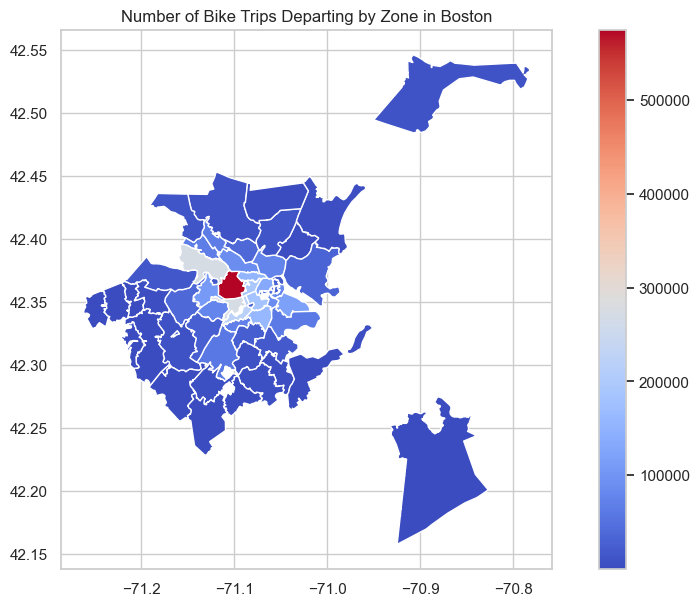

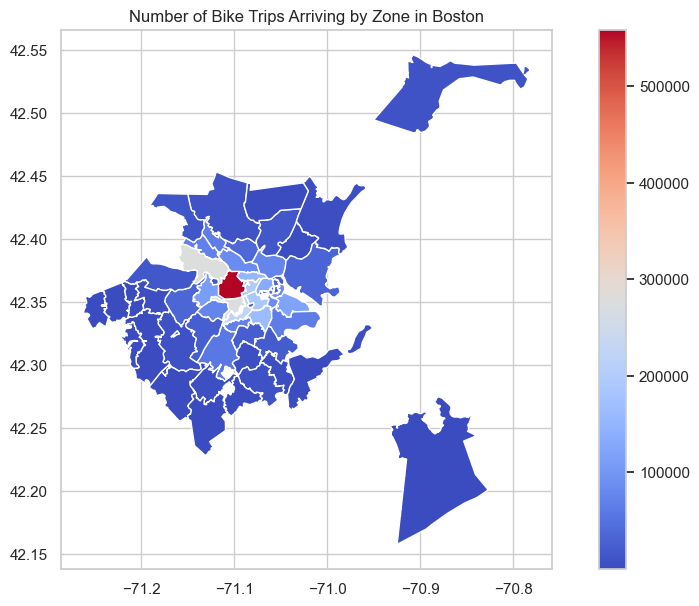

In [13]:
# 1 - leggere il file csv
trips_file = os.path.join(trips_data, year, city + '.csv')
trips_df = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

# 2 - contare i viaggi per ogni zona
zones = dict()
for index, row in trips_df.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']
    
    if start_zone not in zones:
        zones[start_zone] = {'start': 0, 'end': 0}
    if end_zone not in zones:
        zones[end_zone] = {'start': 0, 'end': 0}
    
    zones[start_zone]['start'] += row['trips']
    zones[end_zone]['end'] += row['trips']

zones_df = pd.DataFrame.from_dict(zones, orient='index').reset_index()
zones_df.rename(columns={"index": "zipcode"}, inplace=True)
zipcode_gdf.rename(columns={"ZCTA5CE10": "zipcode"}, inplace=True)
print(zones_df.head())

# 3 - unire i dati dei viaggi con le zone geografiche
merged_gdf = zipcode_gdf.merge(zones_df, on='zipcode', how='right')
merged_gdf.fillna(0, inplace=True)

# 4 - creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='start', ax=ax, legend=True, cmap=color)
ax.set_title(f"Number of Bike Trips Departing by Zone in {city}")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='end', ax=ax, legend=True, cmap=color)
ax.set_title(f"Number of Bike Trips Arriving by Zone in {city}")
sns.set_style("whitegrid")
plt.show()

  zipcode  stations
0   02139        21
1   02138        22
2   02142        12
3   02129        13
4   02215        13


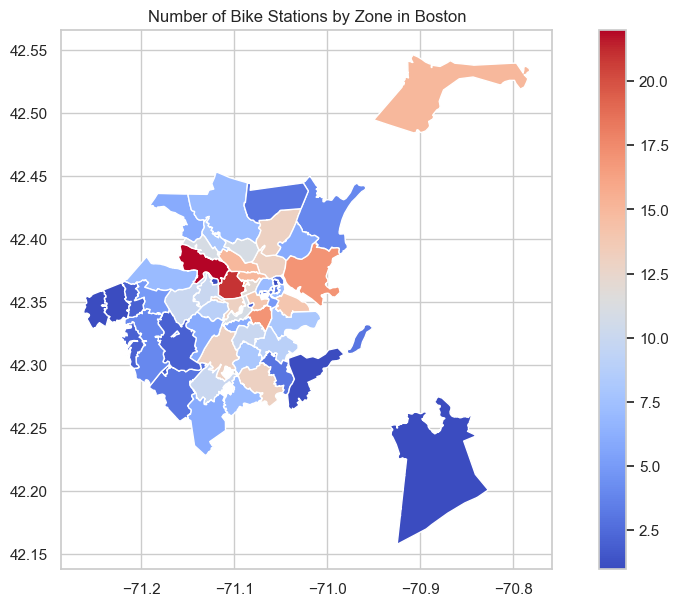

In [14]:
# studio del numero delle stazioni per zona
# cosa fare:
# 1 - leggere il file csv delle stazioni
# 2 - contare le stazioni per ogni zona
# 3 - unire i dati delle stazioni con le zone geografiche
# 4 - creare una mappa

stations_file = os.path.join(stations_data, year, city + '.csv')
stations_df = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

zones = dict()
for index, row in stations_df.iterrows():
    zone = row['zipcode']
    
    if zone not in zones:
        zones[zone] = 0
    
    zones[zone] += 1

zones_df = pd.DataFrame.from_dict(zones, orient='index').reset_index()
zones_df.rename(columns={"index": "zipcode", 0: "stations"}, inplace=True)
print(zones_df.head())
# unire i dati delle stazioni con le zone geografiche

merged_gdf = zipcode_gdf.merge(zones_df, on='zipcode', how='right')

# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='stations', ax=ax, legend=True, cmap=color)
ax.set_title(f"Number of Bike Stations by Zone in {city}")
sns.set_style("whitegrid")
plt.show()


{'02113': {'growth': -0.03284788491667853, 'trips_2021': 56168, 'trips_2022': 54323}, '02110': {'growth': 0.15915144857888233, 'trips_2021': 145660, 'trips_2022': 168842}, '02132': {'growth': 0.3342857142857143, 'trips_2021': 1400, 'trips_2022': 1868}, '02121': {'growth': 0.47708095781071835, 'trips_2021': 8770, 'trips_2022': 12954}, '02465': {'growth': 0.36153846153846153, 'trips_2021': 650, 'trips_2022': 885}, '02120': {'growth': 0.3995912058410787, 'trips_2021': 98338, 'trips_2022': 137633}, '01970': {'growth': 1.7379526272801524, 'trips_2021': 7346, 'trips_2022': 20113}, '02136': {'growth': 5.257028112449799, 'trips_2021': 249, 'trips_2022': 1558}, '02140': {'growth': 0.30570311131866207, 'trips_2021': 102786, 'trips_2022': 134208}, '02142': {'growth': 0.19462718282279834, 'trips_2021': 323778, 'trips_2022': 386794}, '02445': {'growth': 0.015416900413472127, 'trips_2021': 48129, 'trips_2022': 48871}, '02144': {'growth': 0.45156095846138145, 'trips_2021': 88183, 'trips_2022': 128003

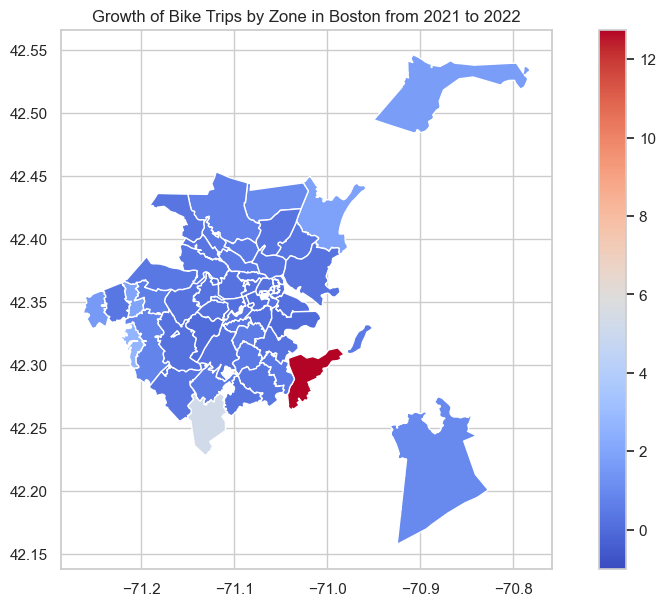

In [15]:
# analisi dell'aumento dell'uso di bike sharing nel tempo
# cosa fare:
# 1 - leggere il file csv dei viaggi 2021 e 2022
# 2 - calcolare l'aumento percentuale dei viaggi per ogni zona
# 3 - unire i dati con le zone geografiche
# 4 - creare una mappa

year = '2021'
year_after = '2022'
city = 'Boston'

trips_file = os.path.join(trips_data, year, city + '.csv')
trips_df_2021 = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

trips_file = os.path.join(trips_data, year_after, city + '.csv')
trips_df_2022 = pd.read_csv(trips_file, dtype={'departure': str, 'arrival': str})

# calcolare l'aumento percentuale dei viaggi per ogni zona
zones_2021 = dict()
for index, row in trips_df_2021.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']
    
    if start_zone not in zones_2021:
        zones_2021[start_zone] = 0
    if end_zone not in zones_2021:
        zones_2021[end_zone] = 0
    
    zones_2021[start_zone] += row['trips']
    zones_2021[end_zone] += row['trips']

zones_2022 = dict()
for index, row in trips_df_2022.iterrows():
    start_zone = row['departure']
    end_zone = row['arrival']
    
    if start_zone not in zones_2022:
        zones_2022[start_zone] = 0
    if end_zone not in zones_2022:
        zones_2022[end_zone] = 0
    
    zones_2022[start_zone] += row['trips']
    zones_2022[end_zone] += row['trips']

zones_growth = dict()
for zone in set(list(zones_2021.keys()) + list(zones_2022.keys())):
    trips_2021 = zones_2021.get(zone, 0)
    trips_2022 = zones_2022.get(zone, 0)
    
    if trips_2021 == 0:
        growth = 1
    else:
        growth = (trips_2022 - trips_2021) / trips_2021

    if zone not in zones_growth:
        zones_growth[zone] = dict()
    
    zones_growth[zone]['growth'] = growth
    zones_growth[zone]['trips_2021'] = trips_2021
    zones_growth[zone]['trips_2022'] = trips_2022

print(zones_growth)
zones_growth_df = pd.DataFrame.from_dict(zones_growth, orient='index').reset_index()
zones_growth_df.rename(columns={"index": "zipcode", 0: "growth"}, inplace=True)
print(zones_growth_df.head())

# order by growth descending
zones_growth_df = zones_growth_df.sort_values(by='growth', ascending=False)
print(zones_growth_df.head())
# unire i dati con le zone geografiche
merged_gdf = zipcode_gdf.merge(zones_growth_df, on='zipcode', how='right')
# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='growth', ax=ax, legend=True, cmap=color)
ax.set_title(f"Growth of Bike Trips by Zone in {city} from {year} to {year_after}")
sns.set_style("whitegrid")
plt.show()

  zipcode  growth  stations_2021  stations_2022
0   02113     0.0              1              1
1   02110     0.0              7              7
2   02132     0.0              3              3
3   02121     0.0              8              8
4   02465    -0.5              2              1


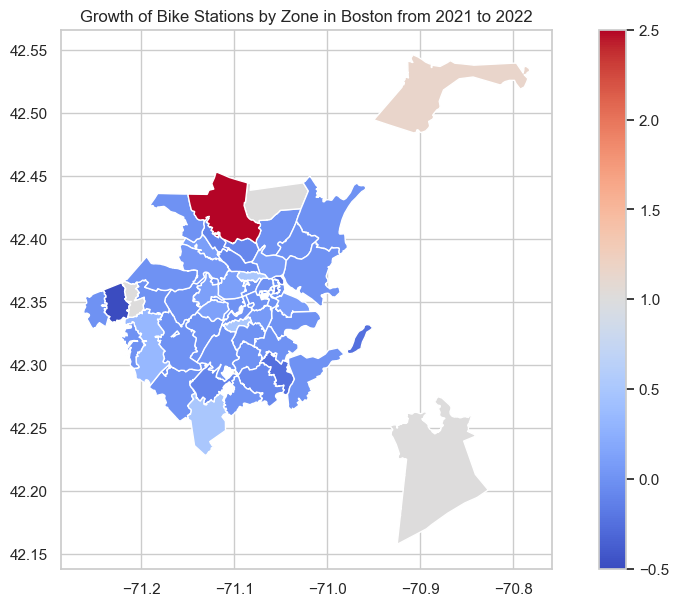

In [16]:
# analisi dell'aumento delle stazioni nel tempo

# cosa fare:
# 1 - leggere il file csv delle stazioni 2021 e 2022
# 2 - calcolare l'aumento percentuale delle stazioni per ogni zona
# 3 - unire i dati con le zone geografiche
# 4 - creare una mappa

year = '2021'
year_after = '2022'

stations_file = os.path.join(stations_data, year, city + '.csv')
stations_df_2021 = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

stations_file = os.path.join(stations_data, year_after, city + '.csv')
stations_df_2022 = pd.read_csv(stations_file, encoding='cp1252', dtype={'zipcode': str})

# calcolare l'aumento percentuale delle stazioni per ogni zona
zones_2021 = dict()
for index, row in stations_df_2021.iterrows():
    zone = row['zipcode']
    
    if zone not in zones_2021:
        zones_2021[zone] = 0
    
    zones_2021[zone] += 1

zones_2022 = dict()
for index, row in stations_df_2022.iterrows():
    zone = row['zipcode']
    
    if zone not in zones_2022:
        zones_2022[zone] = 0
    
    zones_2022[zone] += 1

zones_growth = dict()
for zone in set(list(zones_2021.keys()) + list(zones_2022.keys())):
    stations_2021 = zones_2021.get(zone, 0)
    stations_2022 = zones_2022.get(zone, 0)
    
    if stations_2021 == 0:
        growth = 1
    else:
        growth = (stations_2022 - stations_2021) / stations_2021

    if zone not in zones_growth:
        zones_growth[zone] = dict()
    
    zones_growth[zone]['growth'] = growth
    zones_growth[zone]['stations_2021'] = stations_2021
    zones_growth[zone]['stations_2022'] = stations_2022

zones_growth_df = pd.DataFrame.from_dict(zones_growth, orient='index').reset_index()
zones_growth_df.rename(columns={"index": "zipcode", 0: "growth"}, inplace=True)
print(zones_growth_df.head())
# unire i dati con le zone geografiche

merged_gdf = zipcode_gdf.merge(zones_growth_df, on='zipcode', how='right')
# creare una mappa
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
merged_gdf.plot(column='growth', ax=ax, legend=True, cmap=color)
ax.set_title(f"Growth of Bike Stations by Zone in {city} from {year} to {year_after}")
sns.set_style("whitegrid")
plt.show()

   zipcode  self_loops  total_trips  percentage
56   02043           7            7    1.000000
55   02171          27           27    1.000000
54   01970       10013        10066    0.994735
43   02128       29892        32174    0.929073
50   02151        2421         3801    0.636938


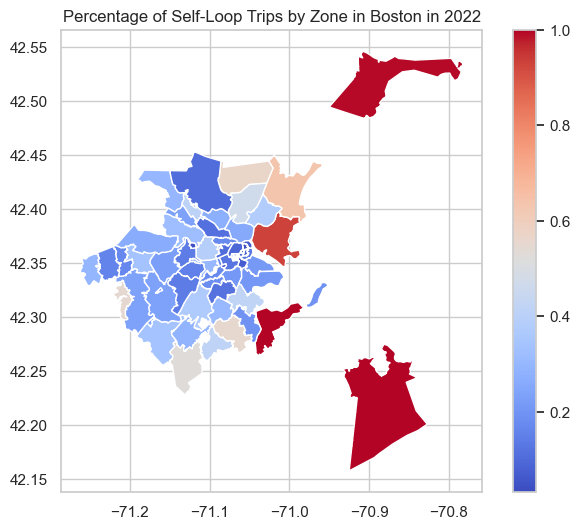

In [20]:
# studio del numero di viaggi che iniziano e finiscono nella stessa zona (percentuale)
# cosa fare:
# 1 - leggere il file csv
# 2 - calcolare la percentuale
# 3 - unire i dati con le zone geografiche
# 4 - visualizzare i risultati nella mappa

year = '2022'
city = 'Boston'

self_loop_df = pd.read_csv(os.path.join(self_loop_data, year, city + '.csv'), dtype={'zipcode': str})
# aggiungere la colonna percentuale
self_loop_df['percentage'] = (self_loop_df['self_loops'] / self_loop_df['total_trips'])

# order by percentage descending
self_loop_df = self_loop_df.sort_values(by='percentage', ascending=False)
print(self_loop_df.head())

fix, ax = plt.subplots(figsize=(8, 6))
merged_gdf = zipcode_gdf.merge(self_loop_df, on='zipcode', how='right')
merged_gdf.plot(column='percentage', ax=ax, legend=True, cmap=color)
ax.set_title(f"Percentage of Self-Loop Trips by Zone in {city} in {year}")
sns.set_style("whitegrid")
plt.show()